In [1]:
import pandas as pd
import numpy as np

In [22]:
df = pd.read_csv('data/train.csv')

In [3]:
df

,Id,Fabricante,Tipo,Pulgadas,ScreenResolution,CPU,RAM,Disco,GPU,OS,Peso,Precio
0,0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.84kg,747.0
1,1,Acer,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,1TB HDD,Nvidia GeForce MX150,Windows 10,2.2kg,422.0
2,2,HP,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,4GB,500GB HDD,AMD Radeon 530,Windows 10,2.1kg,422.0
3,3,Acer,Notebook,15.6,1366x768,AMD A8-Series 7410 2.2GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.4kg,237.0
4,4,HP,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9410 2.9GHz,6GB,1.0TB Hybrid,AMD Radeon R7 M440,Windows 10,2.04kg,337.0
...,...,...,...,...,...,...,...,...,...,...,...,...
945,945,Dell,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,8GB,1TB HDD,Intel HD Graphics 620,Windows 10,2.14kg,331.0
946,946,HP,Ultrabook,14.0,Full HD 1920x1080,Intel Core i5 7500U 2.7GHz,4GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.48kg,663.0
947,947,Toshiba,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.2kg,743.0
948,948,Dell,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R5 M430,Linux,2.3kg,494.0


In [4]:
X = df[['Pulgadas', 'Tipo']]
y = df['Precio']

In [5]:
X = pd.get_dummies(X, columns=['Tipo'], drop_first=True)
X

,Pulgadas,Tipo_Gaming,Tipo_Netbook,Tipo_Notebook,Tipo_Ultrabook,Tipo_Workstation
0,15.6,0,0,1,0,0
1,15.6,0,0,1,0,0
2,15.6,0,0,1,0,0
3,15.6,0,0,1,0,0
4,15.6,0,0,1,0,0
...,...,...,...,...,...,...
945,15.6,0,0,1,0,0
946,14.0,0,0,0,1,0
947,13.3,0,0,1,0,0
948,15.6,0,0,1,0,0


In [6]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X, y)

LinearRegression()

In [10]:
from sklearn.model_selection import cross_val_score


error_value1 = np.mean(cross_val_score(lm, X, y, scoring='neg_root_mean_squared_error'))

print(f"ERROR DE LA MEDIA NEGATIVA AL CUADRADO: {error_value1}")

ERROR DE LA MEDIA NEGATIVA AL CUADRADO: -319.6513710780237


In [11]:
df_test = pd.read_csv('data/test.csv')

In [12]:
df_test

,Id,Fabricante,Tipo,Pulgadas,ScreenResolution,CPU,RAM,Disco,GPU,OS,Peso
0,950,Asus,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4GB,256GB SSD,Intel HD Graphics 520,Linux,2kg
1,951,HP,Notebook,15.6,1366x768,AMD E-Series 7110 1.8GHz,4GB,500GB HDD,AMD Radeon R2 Graphics,Windows 10,1.86kg
2,952,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,No OS,2.4kg
3,953,MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.7kg
4,954,HP,Notebook,14.0,1366x768,Intel Core i5 6200U 2.3GHz,4GB,500GB HDD,Intel HD Graphics 520,Windows 10,1.95kg
...,...,...,...,...,...,...,...,...,...,...,...
345,1295,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg
346,1296,Huawei,Ultrabook,13.0,IPS Panel Full HD 2160x1440,Intel Core i7 7500U 2.7GHz,8GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.05kg
347,1297,HP,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.91kg
348,1298,Acer,Notebook,15.6,1366x768,Intel Pentium Quad Core N4200 1.1GHz,4GB,1TB HDD,Intel HD Graphics 505,Linux,2.1kg


In [13]:
X_test = df_test[['Pulgadas', 'Tipo']]
X_test = pd.get_dummies(X_test, columns=['Tipo'], drop_first=True)

In [14]:
X_test

,Pulgadas,Tipo_Gaming,Tipo_Netbook,Tipo_Notebook,Tipo_Ultrabook,Tipo_Workstation
0,15.6,0,0,1,0,0
1,15.6,0,0,1,0,0
2,15.6,1,0,0,0,0
3,17.3,1,0,0,0,0
4,14.0,0,0,1,0,0
...,...,...,...,...,...,...
345,15.6,0,0,1,0,0
346,13.0,0,0,0,1,0
347,15.6,0,0,1,0,0
348,15.6,0,0,1,0,0


In [15]:
y_test = lm.predict(X_test)

In [16]:
df_sub = pd.DataFrame({'Id': df_test.Id, 'Precio':y_test})
df_sub

,Id,Precio
0,950,489.208041
1,951,489.208041
2,952,1018.271776
3,953,1071.601079
4,954,439.015756
...,...,...
345,1295,489.208041
346,1296,930.849589
347,1297,489.208041
348,1298,489.208041


In [17]:
df_sub.to_csv('submissions/submission_1.csv', index=False)

In [18]:
df_sub

,Id,Precio
0,950,489.208041
1,951,489.208041
2,952,1018.271776
3,953,1071.601079
4,954,439.015756
...,...,...
345,1295,489.208041
346,1296,930.849589
347,1297,489.208041
348,1298,489.208041


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt


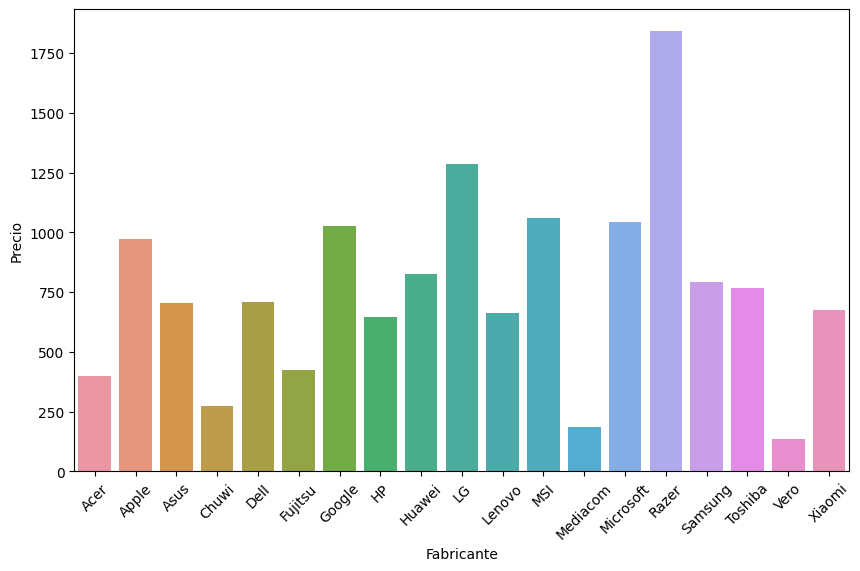

In [38]:
plt.figure(figsize=(10, 6))

fp = df.groupby(by='Fabricante')[list(['Fabricante', 'Precio'])].mean()
fp.reset_index(inplace=True)
chart = sns.barplot(data=fp, x='Fabricante', y='Precio', width=0.8)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45);

In [28]:
sns.barplot(p, p.index)

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

<AxesSubplot:>

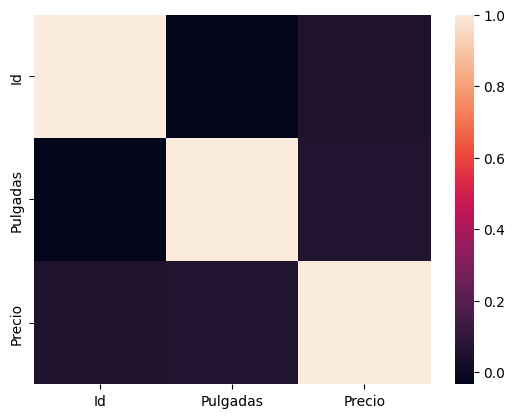

In [23]:
sns.heatmap(df.corr())